# Imports

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Functions

In [5]:
class USDFModel:
    def __init__(self, graph, initial_opinions, trust_levels=None, stubbornness=None):
        self.graph = graph
        self.num_agents = len(graph.nodes())
        self.opinions = np.array(initial_opinions, dtype=float)
        
        self.trust_levels = trust_levels
        self.stubbornness = stubbornness
        
        self.history = [self.opinions.copy()]
        
    def step(self):
        new_opinions = np.zeros(self.num_agents)
        
        for agent in self.graph.nodes():
            neighbors = list(self.graph.neighbors(agent))
            
            if neighbors:
                neighbor_opinions = sum(self.opinions[n] for n in neighbors)
                neighbor_influence = neighbor_opinions / len(neighbors)
                
                trust_weight = self.trust_levels[agent]
                combined_opinion = (self.opinions[agent] * (1 - trust_weight) + neighbor_influence * trust_weight)
                
                stubborn_weight = self.stubbornness[agent]
                new_opinions[agent] = (self.opinions[agent] * stubborn_weight + combined_opinion * (1 - stubborn_weight))
            else:
                new_opinions[agent] = self.opinions[agent]
                
        self.opinions = new_opinions
        self.history.append(self.opinions.copy())
    
    def run(self, max_steps=100, tol=1e-5):
        for step in range(max_steps):
            prev_opinions = self.opinions.copy()
            self.step()
            change = np.abs(self.opinions - prev_opinions).mean()
            if change < tol:
                print(f"Консенсус достигнут на шаге {step + 1}")
                break
        else:
            print(f"Достигнуто максимальное количество шагов: {max_steps}")
        return np.array(self.history)

    def plot_opinions(self):
        history = np.array(self.history)
        plt.figure(figsize=(10, 6))
        for agent in range(self.num_agents):
            plt.plot(history[:, agent], label=f'Агент {agent}')
        plt.xlabel('Шаги')
        plt.ylabel('Мнение')
        plt.title('Динамика мнений в модели USDF')
        plt.legend()
        plt.grid(True)
        plt.show()

# Case

Консенсус достигнут на шаге 23


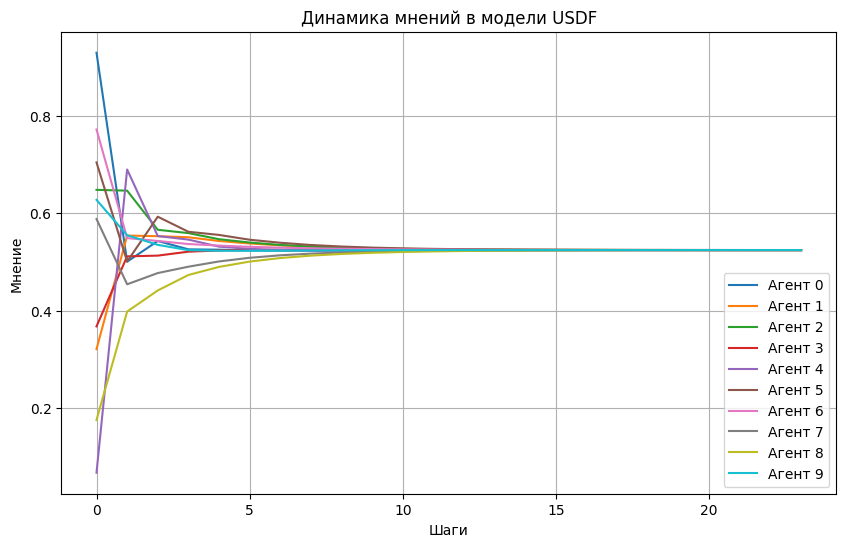

In [6]:
G = nx.erdos_renyi_graph(10, 0.3, seed=42)
    
initial_opinions = np.random.uniform(0, 1, 10)
    
trust_levels = np.random.uniform(0.5, 1, 10)
stubbornness = np.random.uniform(0, 0.3, 10)
    
model = USDFModel(G, initial_opinions, trust_levels, stubbornness)
history = model.run(max_steps=50)
    
model.plot_opinions()